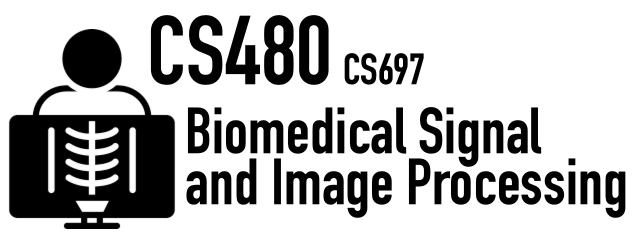
# Assignment 1


**Yiming Shen**

**2/14/2021**

**HW Topic: ECG Data Processing**

[Locate P, Q, S and T waves in ECG](https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [3]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

## **Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

In [4]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

In [5]:
ecg

array([-0.245, -0.215, -0.185, ..., -0.405, -0.395, -0.385])

In [6]:
len(ecg[0:360]) #The first second of ecg

360

In [7]:
len(ecg[0:720]) #The first 2 seconds of ecg

720

In [8]:
def n_second(n):
    return((ecg[SAMPLING_RATE*(n-1):SAMPLING_RATE*n])) #The ecgm of 2 to 3 seconds

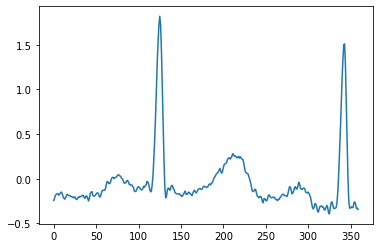

In [9]:
first_second = n_second(1)
len(first_second)
plt.plot(first_second)

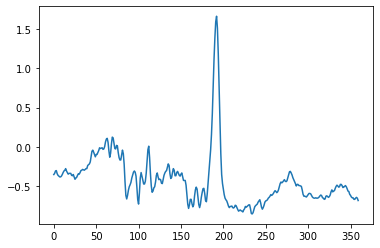

In [10]:
second_second = n_second(2)
len(second_second)
plt.plot(second_second)

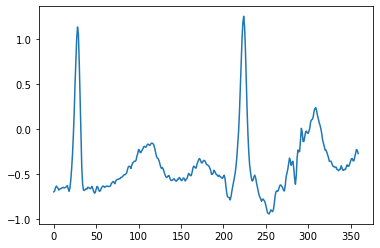

In [11]:
third_second = n_second(3)
len(third_second)
plt.plot(third_second)

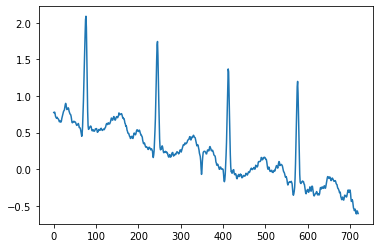

In [12]:
n1 = 8
n2 = 10
from9to11seconds = ecg[SAMPLING_RATE*n1:SAMPLING_RATE*n2]
plt.plot(from9to11seconds)

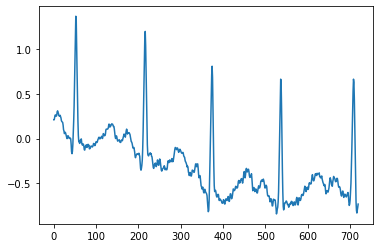

In [13]:
#HW want get result about 8 to 12 seconds.
n1 = 9
n2 = 11
fro10to12seconds = ecg[SAMPLING_RATE*n1:SAMPLING_RATE*n2]
plt.plot(fro10to12seconds)

## **Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [14]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [15]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [16]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [17]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


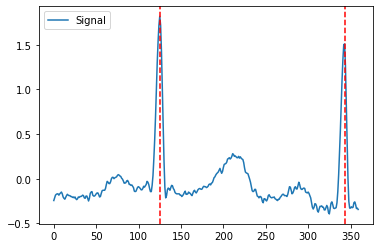

In [18]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [19]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

In [20]:
# you can also plot the first two detected R spikes

#HW want get result about 8 to 12 seconds.
n1 = 9
n2 = 11
e = 100
from10to12seconds = ecg[SAMPLING_RATE*n1-e:SAMPLING_RATE*n2+e] # +- 100 works better than other 
from10to12seconds[1:10]

array([0.235, 0.24 , 0.24 , 0.245, 0.23 , 0.23 , 0.235, 0.215, 0.215])

In [21]:
# we can use neurokit's function to detect the R spikes between 9 to 11 seconds
_, rpeaks_9to11 = nk.ecg_peaks(from10to12seconds, sampling_rate=SAMPLING_RATE)

In [22]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks_9to11['ECG_R_Peaks'])

[152 316 474 636 808]


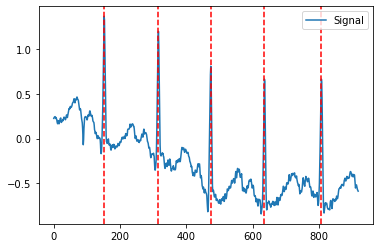

In [23]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks_9to11['ECG_R_Peaks'], from10to12seconds)

## **Task 3:** Detect Heartrate. [15 Points]

In [24]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

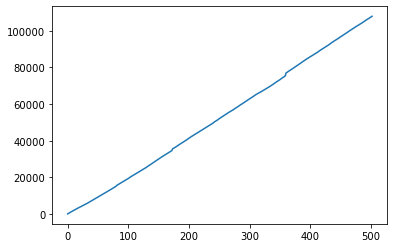

In [25]:
# By checking the attachment, we can estimate the health person should have a smooth ling which different like below one.
plt.plot(rpeaks['ECG_R_Peaks']) 

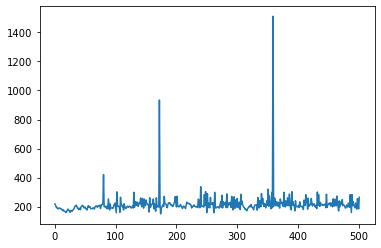

In [26]:
# Subtract away the index of the peak with previous peak.
plt.plot(rpeaks['ECG_R_Peaks'][1:] - rpeaks['ECG_R_Peaks'][:-1])

We can find bolow plot with 3 peaks which means the patient dosen't have a regular heart rate.

In [27]:
# Whole dataset
Preak_error = rpeaks['ECG_R_Peaks'][1:] - rpeaks['ECG_R_Peaks'][:-1]
import pandas as pd
s1 = pd.Series(Preak_error)
s1.describe()

count     502.000000
mean      214.633466
std        72.683474
min       149.000000
25%       194.000000
50%       204.000000
75%       220.750000
max      1512.000000
dtype: float64

In [28]:
# First 100
import pandas as pd
s1 = pd.Series(Preak_error[:100])
s1.describe()

count    100.000000
mean     193.800000
std       27.644935
min      158.000000
25%      182.750000
50%      190.000000
75%      202.000000
max      420.000000
dtype: float64

In [29]:
# 100 - 200
import pandas as pd
s1 = pd.Series(Preak_error[100:200])
s1.describe()

count    100.000000
mean     218.890000
std       76.918019
min      149.000000
25%      196.750000
50%      207.500000
75%      222.000000
max      934.000000
dtype: float64

In [30]:
# 200 - 300
import pandas as pd
s1 = pd.Series(Preak_error[200:300])
s1.describe()

count    100.000000
mean     214.430000
std       30.735514
min      157.000000
25%      196.000000
50%      203.500000
75%      224.500000
max      337.000000
dtype: float64

In [31]:
# 300 - 400
import pandas as pd
s1 = pd.Series(Preak_error[300:400])
s1.describe()

count     100.000000
mean      229.270000
std       133.212283
min       170.000000
25%       197.750000
50%       209.000000
75%       229.250000
max      1512.000000
dtype: float64

In [32]:
# 400 - 500
import pandas as pd
s1 = pd.Series(Preak_error[400:])
s1.describe()

count    102.000000
mean     216.735294
std       25.932863
min      158.000000
25%      202.000000
50%      211.500000
75%      224.000000
max      300.000000
dtype: float64

We can find there are **502** data points of ECG. The std of whole dataset is **72.683474**; the smallest range is [400:502] which is **25.932863**. We can consider the patient have a regular heart rate at last part.

## **Task 4:** Detect P Q S T Peaks. [25 Points]

In [33]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [34]:
#  HW want get result about 9 to 11 seconds.
#  n1 = 9
#  n2 = 11
#  e =100
ecg_PQST = ecg[n1*SAMPLING_RATE-e:n2*SAMPLING_RATE+e]
_,rpeaks_pqst = nk.ecg_peaks(ecg[n1*SAMPLING_RATE-e:n2*SAMPLING_RATE+e], sampling_rate=SAMPLING_RATE)

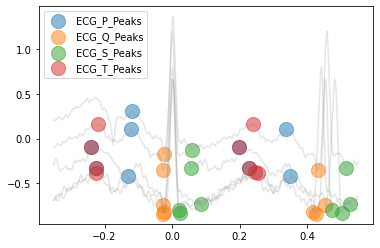

In [35]:
_, waves_peak = nk.ecg_delineate(ecg_PQST, rpeaks_pqst['ECG_R_Peaks'], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

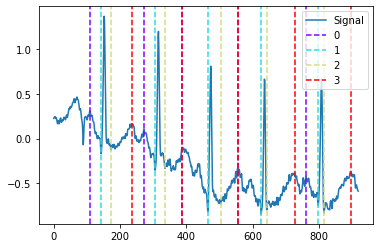

In [36]:
PQST_plot = nk.events_plot([waves_peak['ECG_P_Peaks'][:5], 
                            waves_peak['ECG_Q_Peaks'][:5], 
                            waves_peak['ECG_S_Peaks'][:5],
                            waves_peak['ECG_T_Peaks'][:5],], ecg_PQST)

In [37]:
# TODO Does the detection work well?

The detection function is **not** working well which looks not very clearly like neurokit2. The second PQST_plot, successfully marked the P,Q,S and T which work well than ecg_peaks function.

## **Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

In [38]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

In [39]:
#  HW want get result about 9 to 11 seconds.
#  n1 = 9
#  n2 = 11
#  e = 100
new_n1 = n1*SAMPLING_RATE - e
new_n2 = n2*SAMPLING_RATE + e
New_ecg_whole = ecg[new_n1:new_n2]

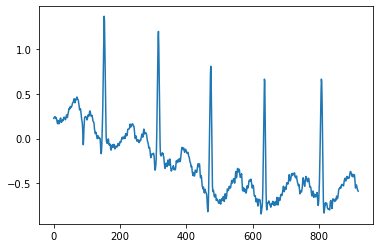

In [40]:
plt.plot(New_ecg_whole)

In [49]:
_, rpeaks_overviewRange = nk.ecg_peaks(New_ecg_whole, sampling_rate=SAMPLING_RATE)

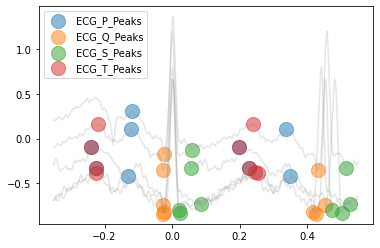

In [50]:
_, waves_peaks = nk.ecg_delineate(New_ecg_whole, rpeaks_overviewRange['ECG_R_Peaks'], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [51]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [52]:
filtered_ecg = nk.signal_filter(New_ecg_whole,lowcut=2,highcut=30,sampling_rate=SAMPLING_RATE)

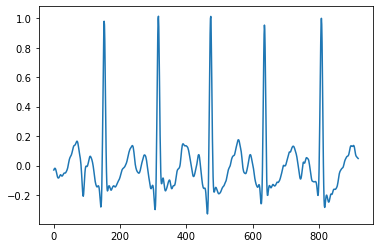

In [53]:
plt.plot(filtered_ecg)

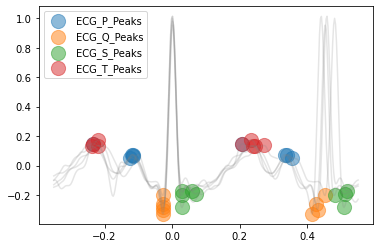

In [54]:
_, waves_peaks = nk.ecg_delineate(filtered_ecg, rpeaks_overviewRange['ECG_R_Peaks'], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [47]:
# TODO Does the filtering improve the result?

Yes. We can find the filtering is great improve the reuslt.

In [48]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#